In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

In [ ]:
data=pd.read_csv(r"C:\Users\etisalat\Desktop\Etisalat Main Folder\Training Materials\Deep Learning\Final material\dataset\cancer_classification (1).csv")

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.shape

(569, 31)

In [ ]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [ ]:
# find the total number of cancer Vs. Noncancer ??
data.groupby('benign_0__mal_1')['benign_0__mal_1'].count()

benign_0__mal_1
0    212
1    357
Name: benign_0__mal_1, dtype: int64

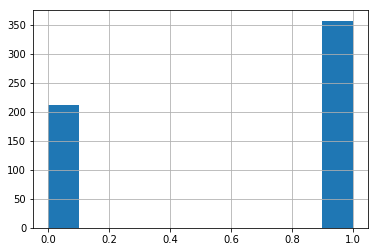

In [ ]:
# do the same by matplotlib using histogram
data['benign_0__mal_1'].hist()

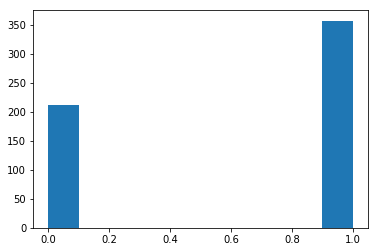

In [ ]:
plt.hist(data['benign_0__mal_1'])
plt.show()

In [ ]:
import seaborn as sns

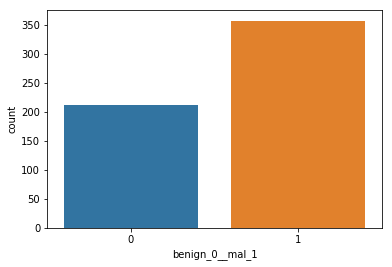

In [ ]:
sns.countplot(data=data,x='benign_0__mal_1')

### split the data into x and y

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [ ]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### normalization for (x)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

In [ ]:
x_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

### split to training and testing 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.3,random_state=123)

In [ ]:
xtrain.shape

(398, 30)

In [ ]:
xtest.shape

(171, 30)

### Create ANN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential() # please include Sequential and Dense in the same cell to avoid any duplication for the number of layers incase of re-executing the cell 

model.add(Dense(30,activation="relu")) # 1st HL
model.add(Dense(20,activation="relu")) # 2nd HL
model.add(Dense(1,activation="sigmoid")) # o/p layer since it's classification problem we will use sigmoid activation function

### select optimizer and loss function

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy")

### feed the data into the model , choose the spoch and batch size

In [ ]:
model.fit(xtrain,ytrain,epochs=50,batch_size=1,validation_data=(xtest,ytest))

Train on 398 samples, validate on 171 samples
Epoch 1/50
398/398 [==============================] - 1s 4ms/step - loss: 0.5093 - val_loss: 0.3067
Epoch 2/50
398/398 [==============================] - 1s 2ms/step - loss: 0.2375 - val_loss: 0.1795
Epoch 3/50
398/398 [==============================] - 1s 2ms/step - loss: 0.1792 - val_loss: 0.1312
Epoch 4/50
398/398 [==============================] - ETA: 0s - loss: 0.137 - 1s 2ms/step - loss: 0.1368 - val_loss: 0.1099
Epoch 5/50
398/398 [==============================] - 1s 2ms/step - loss: 0.1236 - val_loss: 0.0829
Epoch 6/50
398/398 [==============================] - 1s 2ms/step - loss: 0.1082 - val_loss: 0.0926
Epoch 7/50
398/398 [==============================] - 1s 3ms/step - loss: 0.0964 - val_loss: 0.0721
Epoch 8/50
398/398 [==============================] - 1s 2ms/step - loss: 0.0937 - val_loss: 0.1022
Epoch 9/50
398/398 [==============================] - 1s 2ms/step - loss: 0.0870 - val_loss: 0.0651
Epoch 10/50
398/398 [=========

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  930       
_________________________________________________________________
dense_4 (Dense)              multiple                  620       
_________________________________________________________________
dense_5 (Dense)              multiple                  21        
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.history.history

{'val_loss': [0.30673672371048327,
  0.17950135185138175,
  0.13120156293479612,
  0.10992537306600225,
  0.0828773857418617,
  0.09259698289497996,
  0.07214944073966337,
  0.10218446597644272,
  0.06511901036206938,
  0.08166226450129288,
  0.05906627708388417,
  0.06026680337911206,
  0.06195289060323995,
  0.0643897062720399,
  0.07459427055575445,
  0.12731985808682372,
  0.06532375069790891,
  0.06657774011390521,
  0.06544907528532759,
  0.07395896639470105,
  0.07708737182329287,
  0.07277382944075346,
  0.11623560690479094,
  0.12106554257883928,
  0.08551106159988878,
  0.09452595422896266,
  0.09402557560177037,
  0.08871148677603766,
  0.0933181537250386,
  0.0923695131257669,
  0.12240616154839656,
  0.10220789933406711,
  0.09179289795956909,
  0.11059698528106247,
  0.08505216990925345,
  0.09993848336069616,
  0.12926790618317882,
  0.12866021177348846,
  0.11529356945830033,
  0.1190042570165359,
  0.10450022657548765,
  0.10819678292570258,
  0.13129419495621242,
  0.

In [ ]:
val_loss=pd.DataFrame(model.history.history)

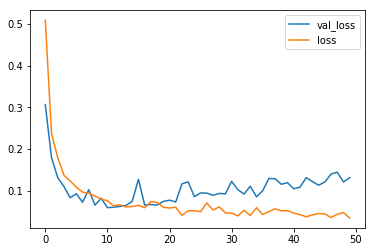

In [ ]:
val_loss.plot()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
stop=EarlyStopping(patience=5)

In [ ]:
model2=Sequential() # please include Sequential and Dense in the same cell to avoid any duplication for the number of layers incase of re-executing the cell 
model2.add(Dense(30,activation="relu")) # 1st HL
model2.add(Dense(20,activation="relu")) # 2nd HL
model2.add(Dense(1,activation="sigmoid")) # o/p layer since it's classification problem we will use sigmoid activation function
model2.compile(optimizer="adam",loss="binary_crossentropy")
model2.fit(xtrain,ytrain,epochs=50,batch_size=1,validation_data=(xtest,ytest),callbacks=[stop])

Train on 398 samples, validate on 171 samples
Epoch 1/50
398/398 [==============================] - 1s 4ms/step - loss: 0.5364 - val_loss: 0.4141
Epoch 2/50
398/398 [==============================] - 1s 2ms/step - loss: 0.2801 - val_loss: 0.2031
Epoch 3/50
398/398 [==============================] - 1s 2ms/step - loss: 0.1970 - val_loss: 0.1474
Epoch 4/50
398/398 [==============================] - 1s 2ms/step - loss: 0.1582 - val_loss: 0.1045
Epoch 5/50
398/398 [==============================] - 1s 2ms/step - loss: 0.1283 - val_loss: 0.1148
Epoch 6/50
398/398 [==============================] - 1s 2ms/step - loss: 0.1164 - val_loss: 0.0823
Epoch 7/50
398/398 [==============================] - 1s 2ms/step - loss: 0.1044 - val_loss: 0.0730
Epoch 8/50
398/398 [==============================] - 1s 2ms/step - loss: 0.0963 - val_loss: 0.0803
Epoch 9/50
398/398 [==============================] - 1s 2ms/step - loss: 0.0891 - val_loss: 0.0634
Epoch 10/50
398/398 [==============================] -

In [ ]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  930       
_________________________________________________________________
dense_7 (Dense)              multiple                  620       
_________________________________________________________________
dense_8 (Dense)              multiple                  21        
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.history.history

{'val_loss': [0.4141468220548323,
  0.2030946601819443,
  0.14735933146346736,
  0.10449497053623577,
  0.11480032635289829,
  0.08231314848272202,
  0.07303885017426294,
  0.08032526017381028,
  0.06336043853806711,
  0.09723239219466953,
  0.08001856992252891,
  0.06761709998845296,
  0.06287117804085114,
  0.07644344528204253,
  0.09582320927401873,
  0.07390514787230149,
  0.06637116587150002,
  0.07011538319026957],
 'loss': [0.5363567402614421,
  0.28009408774485006,
  0.19700292999606114,
  0.15821805897322616,
  0.12828711929435013,
  0.11635312018463932,
  0.10438716180029839,
  0.09628237903160494,
  0.08908191029358731,
  0.0789408989293687,
  0.07726968587021656,
  0.07792341443652344,
  0.07460322929544712,
  0.07890413466260122,
  0.06425789405486151,
  0.06964595846770293,
  0.06006169994477885,
  0.05411272526870117]}

In [ ]:
stop_loss=pd.DataFrame(model2.history.history)

In [ ]:
stop_loss

,val_loss,loss
0,0.414147,0.536357
1,0.203095,0.280094
2,0.147359,0.197003
3,0.104495,0.158218
4,0.114800,0.128287
5,0.082313,0.116353
6,0.073039,0.104387
7,0.080325,0.096282
8,0.063360,0.089082
9,0.097232,0.078941


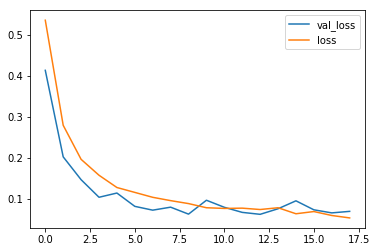

In [ ]:
stop_loss.plot()

## 2nd way to draw the loss 

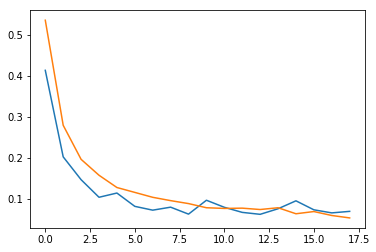

In [ ]:
plt.plot(stop_loss)

### evaluation for model1

In [ ]:
ypred1=model.predict_classes(xtest)
ypred2=model2.predict_classes(xtest)

In [ ]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

### acc for model 1 

In [ ]:
accuracy_score(ytest,ypred1)

0.9883040935672515

### acc for model2

In [ ]:
accuracy_score(ytest,ypred2)

0.9883040935672515

In [ ]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.98      1.00      0.99       103

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [ ]:
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.98      1.00      0.99       103

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



### 1st solution to get the accuracy for newer tensorflow version 2.7

In [ ]:
ypred=model.predict(xtest)
ypred

In [ ]:
cla=[]

for i in ypred1:
    if i >0.5:
        cla.append(1)
    else:
        cla.append(0)

In [ ]:
arr=np.array(cla)
arr.reshape((171, 1))

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [ ]:
ypred1

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

### 2nd solution

In [ ]:
ypred=model.predict(xtest)
#ypred_classes=np.argmax(ypred,axis=1)
ypred_classes = (model.predict(xtest) > 0.5).astype("int32")
ypred_classes

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    